In [1]:
#Import the relevant modules
import os
from dotenv import load_dotenv

import requests
import json

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#Load secret API key from .env file
load_dotenv()

fred_api_key = os.getenv('fred_api_key')
print('fred_api_key: ', fred_api_key)

FRED_API_key:  bdfea3a930932e399e4fc9f6f29904e3


In [3]:
#Load the oil price time series from api.stlouisfed.org
series_id = 'POILWTIUSDM'
realtime_start = '2000-01-01'
realtime_end = '2022-09-24'
api_key = FRED_API_key

'''
## Data Sourcce ##
International Monetary Fund, Global price of WTI Crude [POILWTIUSDM],
retrieved from FRED, Federal Reserve Bank of St. Louis;
https://fred.stlouisfed.org/series/POILWTIUSDM, September 26, 2022.
'''

resp = requests.get(
    'https://api.stlouisfed.org/fred/series/observations?series_id='+
    series_id +'&realtime_start=' +realtime_start+ '&realtime_end='+
    realtime_end+'&api_key='+api_key+'&file_type=json')

if resp.status_code != 200:
    # This means something went wrong.
    print(resp.status_code)

In [4]:
#Load the request response as a JSON file: json_data
json_data = resp.json()

In [5]:
#Explore the json_data keys and values
for keys, values in json_data.items(): 
    #for "observation" key, don't print the value beacuse it is very long
    if keys == 'observations':
        print(keys)
    else:
        print(keys, values)

realtime_start 2010-01-01
realtime_end 2022-09-24
observation_start 1600-01-01
observation_end 9999-12-31
units lin
output_type 1
file_type json
order_by observation_date
sort_order asc
count 1161
offset 0
limit 100000
observations


In [6]:
#print the first and last observation
[print(json_data['observations'][i]) for i in [0,-1]]

{'realtime_start': '2015-11-06', 'realtime_end': '2019-07-22', 'date': '1980-01-01', 'value': '37'}
{'realtime_start': '2022-08-24', 'realtime_end': '2022-09-24', 'date': '2022-07-01', 'value': '103.734761904762'}


[None, None]

In [7]:
df = pd.DataFrame.from_dict(json_data['observations'])
df = df.drop(columns = ['realtime_start','realtime_end'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1161 non-null   object
 1   value   1161 non-null   object
dtypes: object(2)
memory usage: 18.3+ KB
None


In [8]:
df = df.loc[df['value'] != '.']

In [9]:
df = df.astype({"date": 'datetime64[ns]', "value": float})

In [10]:
df_2010 = df.loc[df['date'] >= realtime_start]

In [11]:
print(df_2010.head())
print(df_2010.tail())

          date      value
808 2010-01-01  78.337500
809 2010-01-01  78.386190
810 2010-01-01  78.300476
811 2010-02-01  76.299000
812 2010-02-01  76.074500
           date       value
1156 2022-03-01  109.852609
1157 2022-04-01  102.781429
1158 2022-05-01  110.650455
1159 2022-06-01  115.649091
1160 2022-07-01  103.734762


In [12]:
print(df_2010.loc[df_2010.value.idxmin()])
print(df_2010.loc[df_2010.value.idxmax()])

date     2020-04-01 00:00:00
value              15.842273
Name: 1114, dtype: object
date     2022-06-01 00:00:00
value             115.649091
Name: 1159, dtype: object


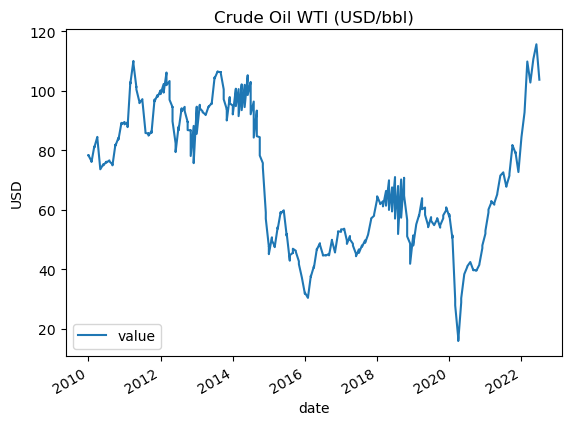

In [13]:
df_2010.plot(x = 'date', y = 'value')
plt.title('Crude Oil WTI (USD/bbl)')
plt.ylabel('USD')
plt.show()

In [23]:
ROOT_DIR = os.path.normpath(os.getcwd() + os.sep + os.pardir)

In [24]:
data_dir = ROOT_DIR + '\\data\\interim\\'


file_name = 'oil_price_2010_2022.csv'
df_2010.to_csv(data_dir+file_name)